# MNIST

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [2]:
# TODO

## Load data

In [3]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

## Helpers

In [4]:
# TODO

##  Data exploration

### Question 1
Hint: `plt.imshow`

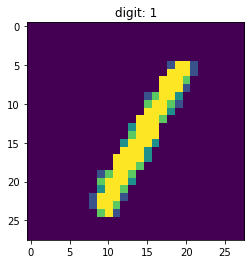

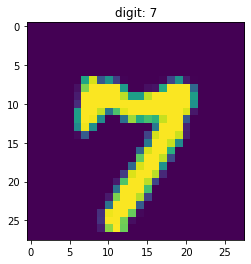

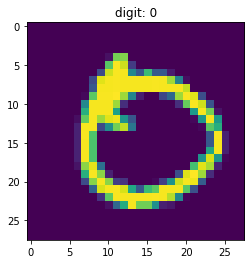

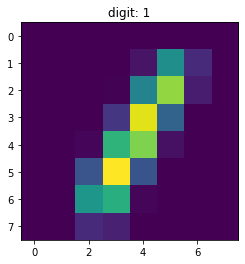

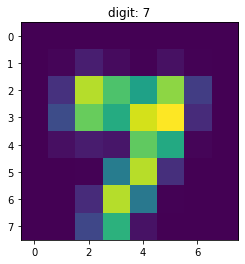

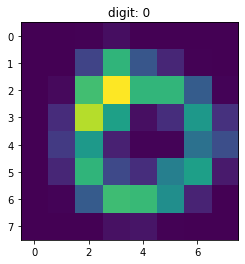

In [6]:
for i in range(3):
    digit_image = mnist_28x28_train[i]
    plt.figure()
    plt.gray()
    plt.title("digit: " + str(train_labels[i]))
    plt.imshow(digit_image)

for i in range(3):
    digit_image = mnist_8x8_train[i]
    plt.figure()
    plt.gray()
    plt.title("digit: " + str(train_labels[i]))
    plt.imshow(digit_image)

##  Data Preparations

### Question 1

In [6]:
# TODO

## Experiments

### Question 1

In [7]:
# TODO

### Question 2

In [8]:
# TODO

### Question 3

In [9]:
# TODO

### Question 4 

In [10]:
#TODO

### Question 5

In [11]:
#TODO

### Question 6

In [12]:
#TODO
prediction = np.array([-1] * len(mnist_8x8_test)) #TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)